# Exercise 2.4-Seaborn

In [16]:
# Importing libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt
import seaborn as sns

In [2]:
# Obtaining citibikes dataset
df_merged = pd.read_csv('NewYork_Bikes_data.csv', index_col = 0)

C:\Users\Usha Bharati\AppData\Local\Temp\ipykernel_3596\877886004.py:2: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_merged = pd.read_csv('NewYork_Bikes_data.csv', index_col = 0)


In [3]:
df_merged.drop(columns = {'_merge'}, inplace = True)

In [4]:
df_merged.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp'],
      dtype='object')

In [5]:
df_merged.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
date                   object
avgTemp               float64
dtype: object

In [6]:
# Setting the theme, style, and color palette
sns.set_theme(style = "white", palette = "PuBuGn")

## Creating a bar chart of the top 20 starting stations frequencies.

In [7]:
df_merged['value'] = 1
df_start_station_frequencies = df_merged.groupby('start_station_name')['value'].count().reset_index()

In [8]:
df_start_station_frequencies

,start_station_name,value
0,1 Ave & E 110 St,22211
1,1 Ave & E 16 St,69320
2,1 Ave & E 18 St,72872
3,1 Ave & E 30 St,46688
4,1 Ave & E 39 St,54145
...,...,...
1756,Wyckoff Ave & Gates Ave,16931
1757,Wyckoff St & 3 Ave,255
1758,Wyckoff St & Nevins St,11753
1759,Wythe Ave & Metropolitan Ave,67866


In [9]:
top20 = df_start_station_frequencies.nlargest(20, 'value')

In [10]:
top20

,start_station_name,value
1587,W 21 St & 6 Ave,131679
1718,West St & Chambers St,126290
495,Broadway & W 58 St,117797
286,6 Ave & W 33 St,109542
8,1 Ave & E 68 St,108412
461,Broadway & E 14 St,101115
485,Broadway & W 25 St,100784
1511,University Pl & E 14 St,100089
463,Broadway & E 21 St,97958
1603,W 31 St & 7 Ave,96157


In [13]:
print(top20.empty)

False


In [14]:
print(top20.head())

         start_station_name   value
1587        W 21 St & 6 Ave  131679
1718  West St & Chambers St  126290
495      Broadway & W 58 St  117797
286         6 Ave & W 33 St  109542
8           1 Ave & E 68 St  108412


StopIteration: 

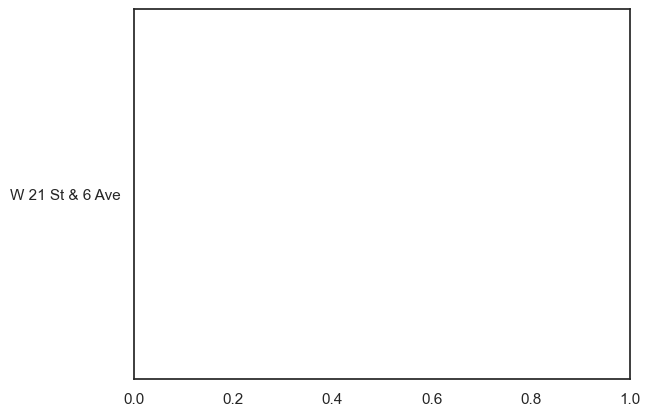

In [17]:
sns.barplot(data = top20, x = 'value', y = 'start_station_name')
plt.title("Most frequent start stations")
plt.show()

### The palette chosen while setting the theme did not work in the bar plot to show top 20 start stations. The reason could be that it is a categorical plot and use of sequential colours PuBuGn is not working here. So, I am changing the palette in this specific plot temporarily.

C:\Users\Usha Bharati\AppData\Local\Temp\ipykernel_3596\77459743.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top20, x = 'value', y = 'start_station_name',palette="PuBuGn_r")


StopIteration: 

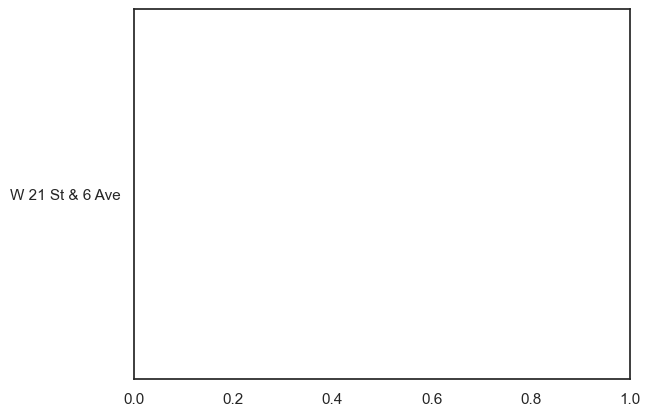

In [12]:
sns.barplot(data = top20, x = 'value', y = 'start_station_name',palette="PuBuGn_r")
plt.title("Most frequent start stations")
plt.show()

## Recreating the dual-axis line plot from the previous Exercise using seaborn.

In [14]:
df_merged['date'] = pd.to_datetime(df_merged['date'])

In [15]:
# Groupby the count of the trips 
df_group = pd.DataFrame(df_merged.groupby(['date'])['ride_id'].count()).reset_index()

In [16]:
# Renaming the ride_id column as trip_count for clarity.
df_group.rename(columns = {'ride_id':'trip_count'}, inplace = True)
# Merging trip count data with weather data.
df_final = df_merged.merge(df_group, on='date', how='outer', indicator='merge_flag')
print(df_final['merge_flag'].value_counts(dropna = False))
print("Shape of January 1st is", df_final[df_final['date'] == '2022-01-01'].shape) # Check
print("Shape of January 2nd is", df_final[df_final['date'] == '2022-01-02'].shape) # Second check

merge_flag
both          30689921
left_only            0
right_only           0
Name: count, dtype: int64
Shape of January 1st is (20895, 18)
Shape of January 2nd is (44234, 18)


In [17]:
df_merged = df_final.set_index('date')
print(df_merged.columns)

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', 'value', 'trip_count', 'merge_flag'],
      dtype='object')


In [18]:
df_merged.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', 'value', 'trip_count', 'merge_flag'],
      dtype='object')

In [19]:
df_merged.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,value,trip_count,merge_flag
date,,,,,,,,,,,,,,,,,
2022-01-01,68FDAB9B6656A4DF,classic_bike,2022-01-01 05:11:08,2022-01-01 05:15:25,W 21 St & 6 Ave,6140.05,W 11 St & 6 Ave,5914.03,40.741740,-73.994156,40.735324,-73.998004,member,11.6,1,20895,both
2022-01-01,91C955306D2CF8A6,electric_bike,2022-01-01 20:54:00,2022-01-01 21:06:39,Bedford Ave & Nassau Ave,5550.05,Sharon St & Olive St,5323.05,40.723117,-73.952123,40.715353,-73.938560,member,11.6,1,20895,both
2022-01-01,B379B77AEB677F2A,electric_bike,2022-01-01 15:48:06,2022-01-01 16:44:21,Central Park W & W 91 St,7453.01,5 Ave & E 87 St,7323.09,40.788665,-73.966801,40.782323,-73.959875,casual,11.6,1,20895,both
2022-01-01,1F1368CC1EEDA296,electric_bike,2022-01-01 02:32:52,2022-01-01 02:44:51,West End Ave & W 78 St,7340.07,W 44 St & 11 Ave,6756.05,40.783786,-73.981687,40.762009,-73.996975,casual,11.6,1,20895,both
2022-01-01,9FE4ABC81014D80D,electric_bike,2022-01-01 17:43:17,2022-01-01 17:52:31,Lawrence St & Willoughby St,4596.09,Carroll St & 6 Ave,4019.06,40.692362,-73.986317,40.674089,-73.978728,member,11.6,1,20895,both


OptionError: No such keys(s): 'mode.use_inf_as_null'

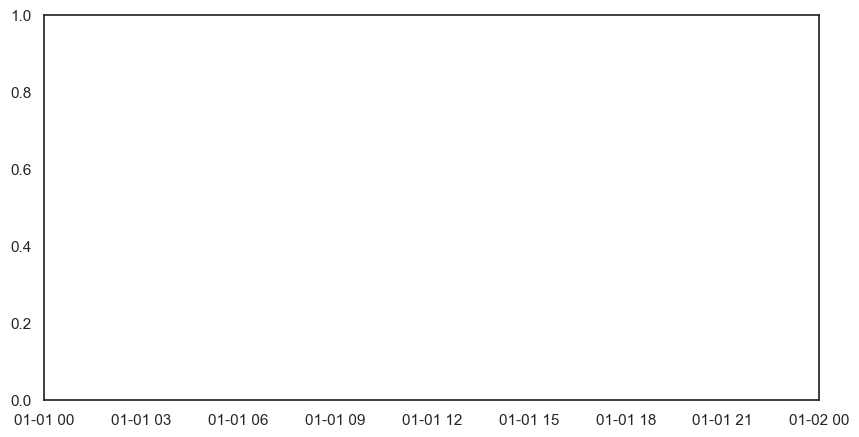

In [20]:
fig,ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data = df_merged['trip_count'], color = "b")
ax.set_xlabel("Year 2022", fontsize = 14) # set x-axis label
ax.set_ylabel("Trip Count", color = "navy", fontsize = 14) # set y-axis label

ax2 = ax.twinx()
sns.lineplot(data = df_merged['avgTemp'], color="r", ax=ax2)
ax2.set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.title('Temperature and trips in 2022', fontsize = 18)
plt.show()

In [20]:
df_merged.dtypes

ride_id                 object
rideable_type           object
started_at              object
ended_at                object
start_station_name      object
start_station_id        object
end_station_name        object
end_station_id          object
start_lat              float64
start_lng              float64
end_lat                float64
end_lng                float64
member_casual           object
avgTemp                float64
value                    int64
trip_count               int64
merge_flag            category
dtype: object

## Box Plot of a categorical variable from the dataset

### (1) I am chosing 'rideable_bike' as categorical variable to obtain box plot as it will give a comparison between types of bikes used.To create this box plot, there is need for a numerical variable which can be obtained as 'tripduration' from 'started_at' and 'ended_at' columns.

In [21]:
# Convert 'started_at' and 'ended_at' to datetime
df_merged['started_at'] = pd.to_datetime(df_merged['started_at'])
df_merged['ended_at'] = pd.to_datetime(df_merged['ended_at'])

In [22]:
# Calculate the ride duration in minutes
df_merged['tripduration'] = (df_merged['ended_at'] - df_merged['started_at']).dt.total_seconds() / 60

In [23]:
df_merged

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,value,trip_count,merge_flag,tripduration
date,,,,,,,,,,,,,,,,,,
2022-01-18,55262E4365A955A2,classic_bike,2022-01-18 08:23:52,2022-01-18 08:28:18,Boerum Pl\t& Pacific St,4488.09,Clinton St & Joralemon St,4605.04,40.688489,-73.991160,40.692395,-73.993379,member,1.8,1,44045,both,4.433333
2022-01-18,75EAB4C9619AB463,classic_bike,2022-01-18 16:45:52,2022-01-18 16:56:03,W 49 St & 8 Ave,6747.06,Amsterdam Ave & W 73 St,7260.09,40.762272,-73.987882,40.779668,-73.980930,member,1.8,1,44045,both,10.183333
2022-01-18,582C4FB96E010416,classic_bike,2022-01-18 08:45:24,2022-01-18 08:54:11,E 88 St & 1 Ave,7235.13,2 Ave & E 72 St,6925.09,40.778301,-73.948813,40.768762,-73.958408,member,1.8,1,44045,both,8.783333
2022-01-18,4FAA081EE6A9B319,electric_bike,2022-01-18 18:12:01,2022-01-18 18:17:15,Clermont Ave & Lafayette Ave,4461.01,Emerson Pl & Myrtle Ave,4683.02,40.687645,-73.969689,40.693631,-73.962236,member,1.8,1,44045,both,5.233333
2022-01-18,AA6CE6206341D731,electric_bike,2022-01-18 13:14:24,2022-01-18 13:25:50,Court St & State St,4488.08,Emerson Pl & Myrtle Ave,4683.02,40.690238,-73.992031,40.693631,-73.962236,member,1.8,1,44045,both,11.433333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-06,ED94422A6716A12C,classic_bike,2022-12-06 20:05:14,2022-12-06 20:23:34,58 St & Pier 4,3220.01,21 St & 4 Ave,3668.04,40.646475,-74.026081,40.662584,-73.995554,member,9.3,1,54229,both,18.333333
2022-12-06,B52203FF8E70A2F2,classic_bike,2022-12-06 11:52:40,2022-12-06 12:12:44,Columbus Ave & W 72 St,7175.05,E 82 St & East End Ave,7049.04,40.777033,-73.979015,40.772461,-73.946821,member,9.3,1,54229,both,20.066667
2022-12-06,EB5E30C734D44D26,classic_bike,2022-12-06 08:24:25,2022-12-06 08:31:10,W 11 St & 6 Ave,5914.03,6 Ave & W 33 St,6364.07,40.735324,-73.998004,40.749013,-73.988484,member,9.3,1,54229,both,6.750000


In [24]:
df_merged.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
avgTemp                      float64
value                          int64
trip_count                     int64
merge_flag                  category
tripduration                 float64
dtype: object

In [25]:
df_merged['tripduration'].describe()

count    3.068992e+07
mean     1.725109e+01
std      8.916414e+01
min     -1.130117e+03
25%      5.466667e+00
50%      9.866667e+00
75%      1.766667e+01
max      5.798598e+04
Name: tripduration, dtype: float64

In [26]:
df_merged['tripduration'].describe().apply(lambda x: format(x, 'f'))

count    30689921.000000
mean           17.251094
std            89.164143
min         -1130.116667
25%             5.466667
50%             9.866667
75%            17.666667
max         57985.983333
Name: tripduration, dtype: object

### Looking at the high standard deviation and the distribution, limit of tripduration somewhere between 80 to 100 seems reasonable. It will help to focus on the main data and filter out the more extreme outliers.

In [27]:
df_merged_1 = df_merged[(df_merged['tripduration'] > 0) & (df_merged['tripduration'] < 80)]

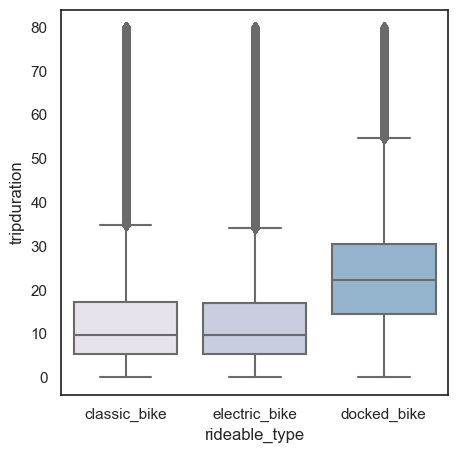

In [62]:
plt.figure(figsize=(5,5))
sns.boxplot(x = 'rideable_type', y = 'tripduration', data = df_merged_1)

plt.show()

### (a) The classic and electric bikes have more or less similar distribution around median and presence of outliers. But also, the median tripduration is relatively lower than docked bikes.
### (b) Tripdurations taken in classic and electric bikes are similar.
### (c) Looking at the whiskers, it also appears that the tripduration taken in docked bikes is very varied that is it includes short trips and long trips as well.

### (2) I am also chosing 'member_casual' as categorical variable to obtain box plot to understand the tripduration with respect to types of users.

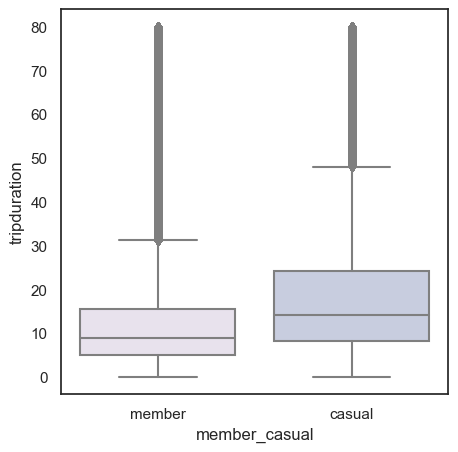

In [61]:
plt.figure(figsize=(5,5))
sns.boxplot(x = 'member_casual', y = 'tripduration', data = df_merged_1)

plt.show()

### (a) The median of member riders is lower than casual riders. 
### (b) IQR (Q3-Q1 range) is less compressed in casual riders which indicates that the casual riders go for more varied tripdurations compared to the member riders.
### (c) It also can be inferred that members have more outliers compared to casual riders. 

In [30]:
df_merged.describe()

,start_lat,start_lng,end_lat,end_lng,avgTemp,value,trip_count,tripduration
count,3.068992e+07,3.068992e+07,3.065240e+07,3.065240e+07,3.068992e+07,30689921.0,3.068992e+07,3.068992e+07
mean,4.074086e+01,-7.397511e+01,4.074065e+01,-7.397521e+01,1.711620e+01,1.0,9.785615e+04,1.725109e+01
std,3.912773e-02,2.596402e-02,3.906920e-02,2.598109e-02,8.561364e+00,0.0,2.865358e+04,8.916414e+01
min,4.062737e+01,-7.402802e+01,4.056000e+01,-7.428000e+01,-1.170000e+01,1.0,2.927000e+03,-1.130117e+03
25%,4.071606e+01,-7.399377e+01,4.071606e+01,-7.399380e+01,1.140000e+01,1.0,7.696600e+04,5.466667e+00
50%,4.073945e+01,-7.398163e+01,4.073936e+01,-7.398166e+01,1.790000e+01,1.0,1.066200e+05,9.866667e+00
75%,4.076341e+01,-7.395916e+01,4.076319e+01,-7.395922e+01,2.410000e+01,1.0,1.203760e+05,1.766667e+01
max,4.088398e+01,-7.387859e+01,4.106000e+01,-7.375000e+01,3.130000e+01,1.0,1.387370e+05,5.798598e+04


## FacetGrid plot

In [51]:
df_merged_1['tripduration'].describe().apply(lambda x: format(x, 'f'))

count    30363078.000000
mean           13.238534
std            11.568326
min             0.016667
25%             5.433333
50%             9.750000
75%            17.300000
max            79.983333
Name: tripduration, dtype: object

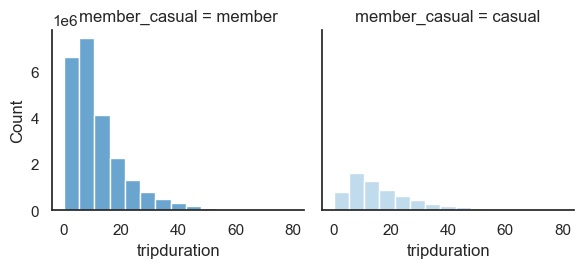

In [65]:
# I have opted to provide palette choice temporarily for Facetgrid plot to differentiate the histogram obtained for the members and casual riders. 
grid = sns.FacetGrid(df_merged_1, col="member_casual",hue="member_casual",palette="Blues_r")

grid.map(sns.histplot, "tripduration", bins = 15)
plt.show()

### (a) The histograms reveal that both member and casual users tend to have shorter trip durations. This is evident from the high concentration of trips that last less than 20 minutes in both categories. 
### (b) Casual percentage is very smaller compared to the total count.
### (c) Shorter trips are indicating routine use for commuting or short-distance travel by members and casual riders. Longer trips are not common amongst members and casual riders.

In [ ]:
df_merged.to_csv('NewYork_data.csv')